# **Student Performance in Exams**

# **Exploratory Data Analysis**

In [ ]:
pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Import necessary packages
import numpy as np 
import pandas as pd 
from scipy.stats import iqr as sc
from scipy.cluster.hierarchy import dendrogram, linkage
import statsmodels.api as sm
pd.set_option('max_columns', 100)
import mglearn

#visualizing
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from shapely.geometry import Point, Polygon
import plotly.express as px
import seaborn as sns
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pandas.plotting import scatter_matrix
import warnings
import nltk
import missingno as msno
import os
from wordcloud import WordCloud
sns.set()
%matplotlib inline

#metrics and split
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#model imports
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.linear_model import Ridge

In [ ]:
# load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/StudentsPerformance.csv') 

#View First
df.head(15)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [ ]:
# Print sample
df.sample(10).reset_index(drop=True).style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group E,associate's degree,standard,completed,66,63,64
1,male,group B,master's degree,free/reduced,none,49,53,52
2,female,group C,high school,free/reduced,none,34,42,39
3,female,group B,some college,free/reduced,none,45,53,55
4,male,group C,bachelor's degree,standard,none,69,63,61
5,female,group D,high school,standard,none,45,63,59
6,female,group D,bachelor's degree,standard,none,65,67,62
7,female,group C,associate's degree,free/reduced,none,53,61,62
8,male,group C,associate's degree,standard,none,46,43,42
9,female,group C,high school,free/reduced,none,66,76,68


In [ ]:
df.shape

(1000, 8)

In [ ]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [ ]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

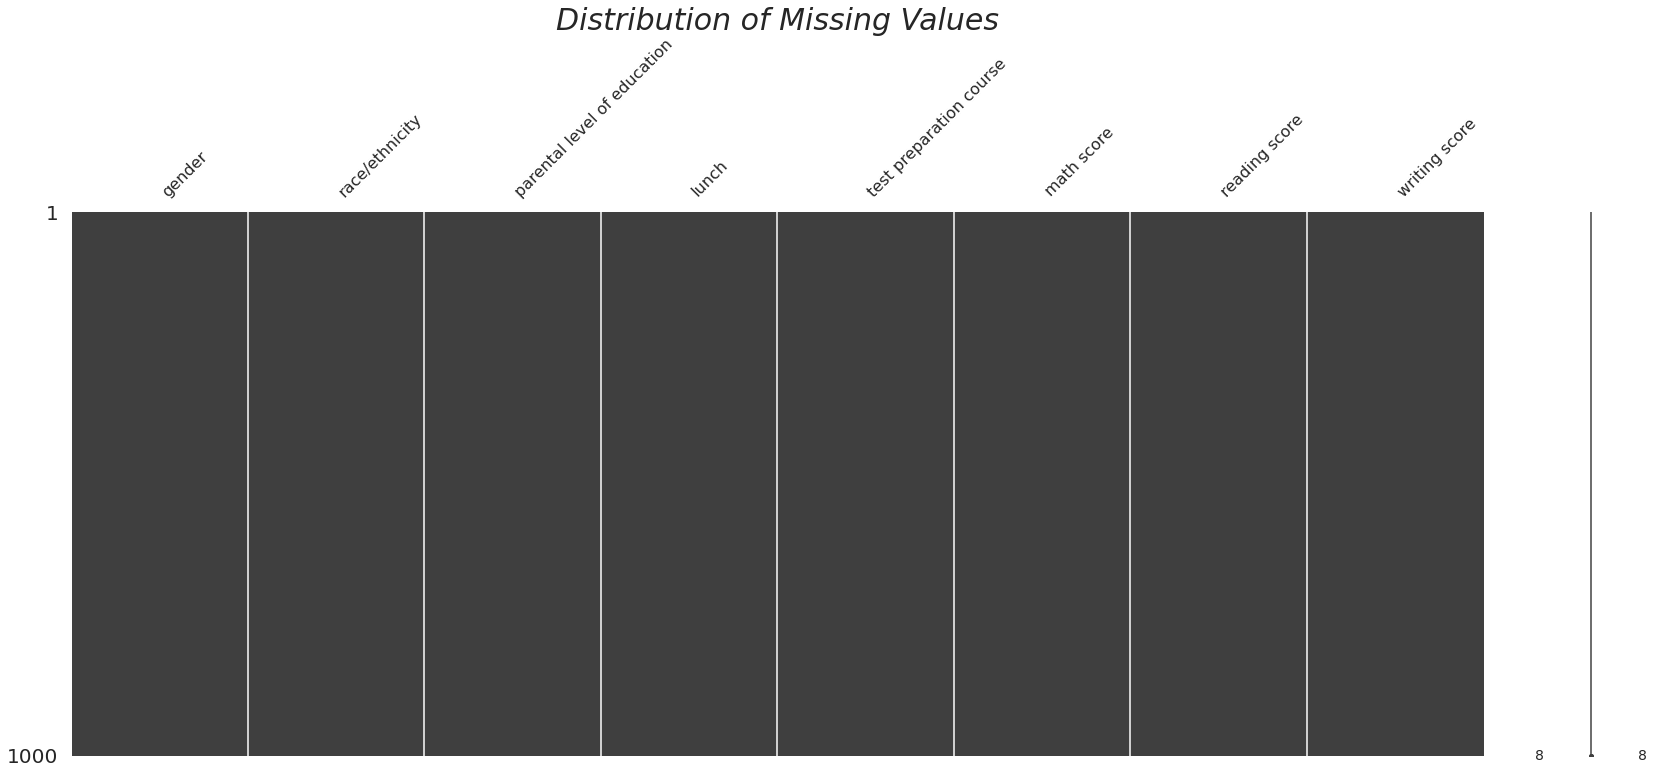

In [ ]:
msno.matrix(df)
plt.title('Distribution of Missing Values',fontsize=30, fontstyle= 'oblique');

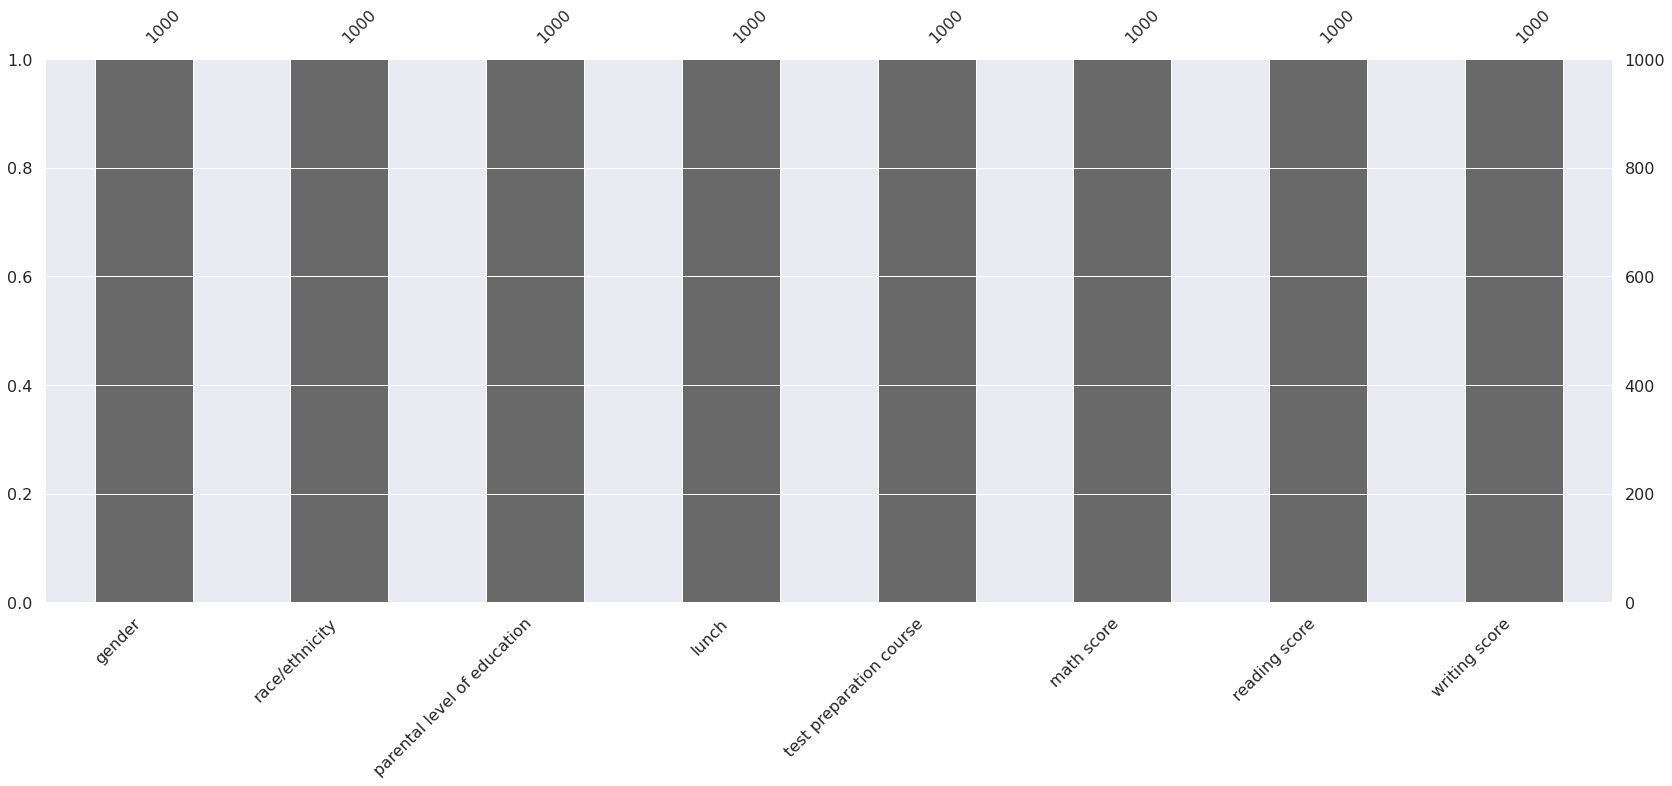

In [ ]:
msno.bar(df)
plt.show()

In [ ]:
#knn fill n/a with mean
df= df.fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [ ]:
df.duplicated().sum()

0

In [ ]:
#summary stats
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

In [ ]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


Text(0.5, 1.0, 'Confusion Matrix')

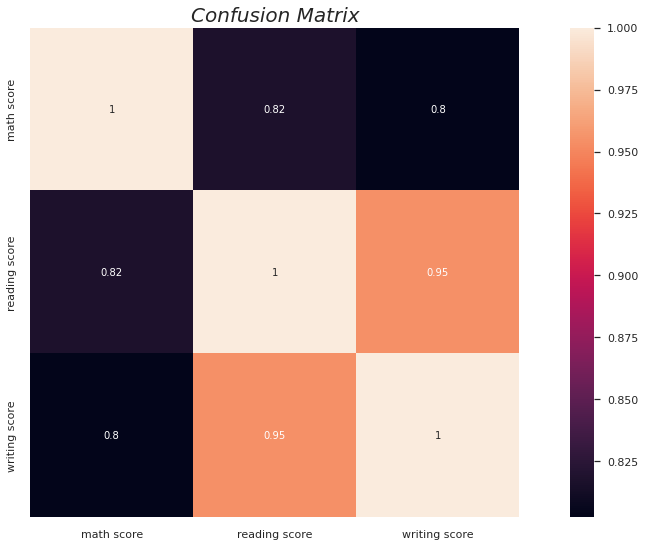

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True, square=True);
plt.title("Confusion Matrix", fontsize=20, fontstyle="oblique")

In [ ]:
#create average score colum
df['average_score']=(df['math score']
                +df['reading score']+df['writing score'])//3
df.average_score.value_counts()
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72
1,female,group C,some college,standard,completed,69,90,88,82
2,female,group B,master's degree,standard,none,90,95,93,92
3,male,group A,associate's degree,free/reduced,none,47,57,44,49
4,male,group C,some college,standard,none,76,78,75,76


In [ ]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [ ]:
gender_df=df['gender'].value_counts()
fig=px.treemap(gender_df,
               path=[gender_df.index],
               values=gender_df.values,
               title="Gender distribution",
               color=gender_df.index,
               color_discrete_sequence=px.colors.sequential.PuBuGn,
               template='plotly_dark',
               width=1000, height=500
              )
fig.data[0].customdata = [51.8, 48.2]
fig.data[0].texttemplate = '%{label}<br>%{value}<br>%{customdata}%'
percents = np.round((100*gender_df.values / sum(gender_df.values)).tolist(),2)
fig.update_layout(font=dict(size=19,family="Franklin Gothic"))

fig.show()

In [ ]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [ ]:
race_ethnicity=df['race/ethnicity'].value_counts()
fig=px.pie(values=race_ethnicity.values,
          names=race_ethnicity.index,
          color_discrete_sequence=px.colors.sequential.PuBu,
          title="Race/Ethnicity distribution", template="plotly_dark")

fig.update_traces(textinfo='label+percent+value', textfont_size=14,
                  marker=dict(line=dict(color='#100000', width=0.2)))
fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.update_layout(
    font=dict(size=20,family="Franklin Gothic"))
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



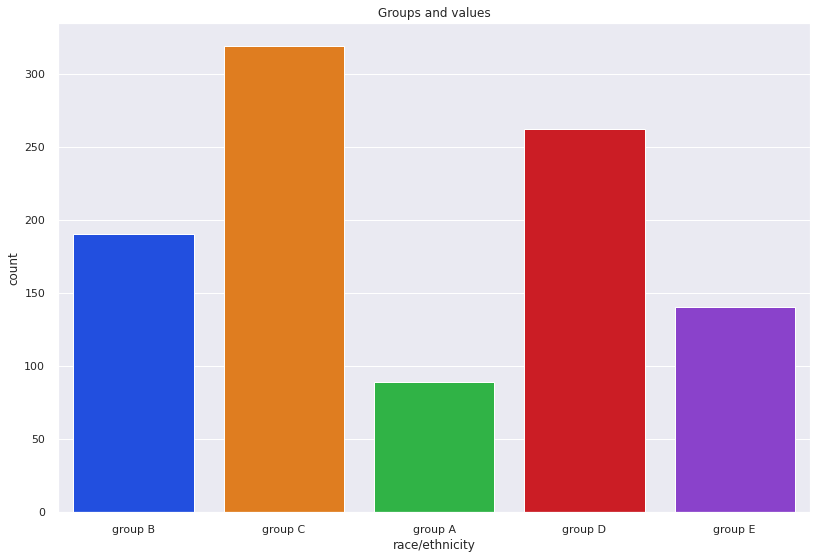

In [ ]:
sns.set_palette('bright')
plt.figure(figsize=(12,9))
sns.countplot(df['race/ethnicity'])
plt.title('Groups and values')
plt.show()

In [ ]:
level=df['parental level of education'].value_counts()

In [ ]:
fig=px.bar(y=level.values,
          x=level.index,
          color=level.index,
          color_discrete_sequence=px.colors.sequential.deep,
          text=level.values,
          title="Parental level of education distribution",
          template="plotly_dark")
fig.update_layout(xaxis_title="Level of education",
                 yaxis_title="Count",
                 font=dict(size=17,family="Franklin Gpthic"))
fig.show()

In [ ]:
#WordCloud of Parental of education
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

def Word_Cloud(data, color_background, colormap, title):
    plt.figure(figsize = (20,10))
    wc = WordCloud(width=1200, 
               height=600, 
               max_words=50,
               colormap= colormap,
               max_font_size = 100,
               random_state=88, 
               background_color=color_background).generate_from_frequencies(data)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

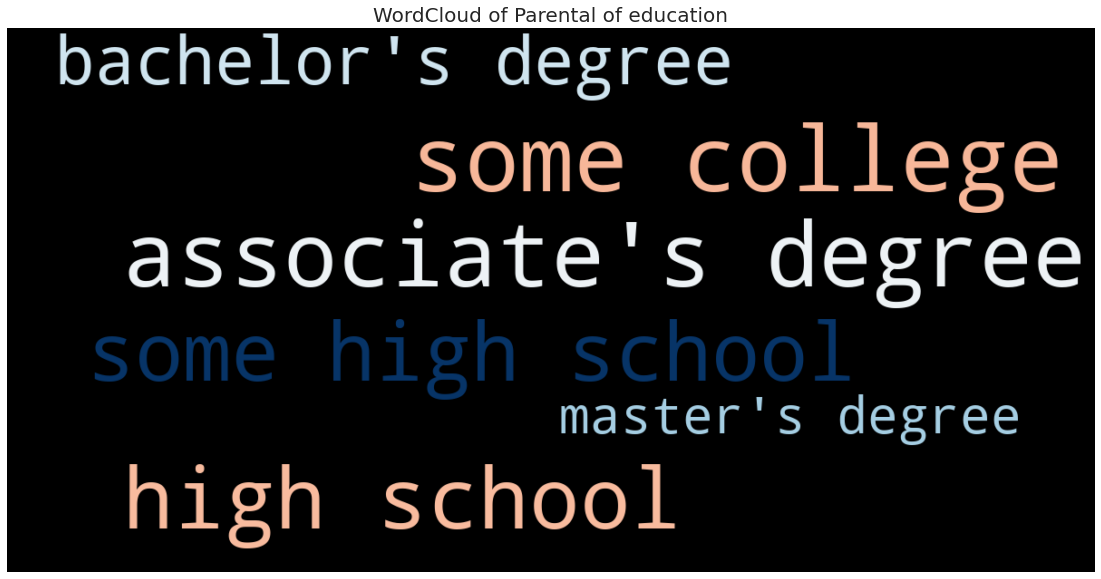

In [ ]:
freq_df = Freq_df(df['parental level of education'].values.tolist())
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data ,'black','RdBu', 'WordCloud of Parental of education')

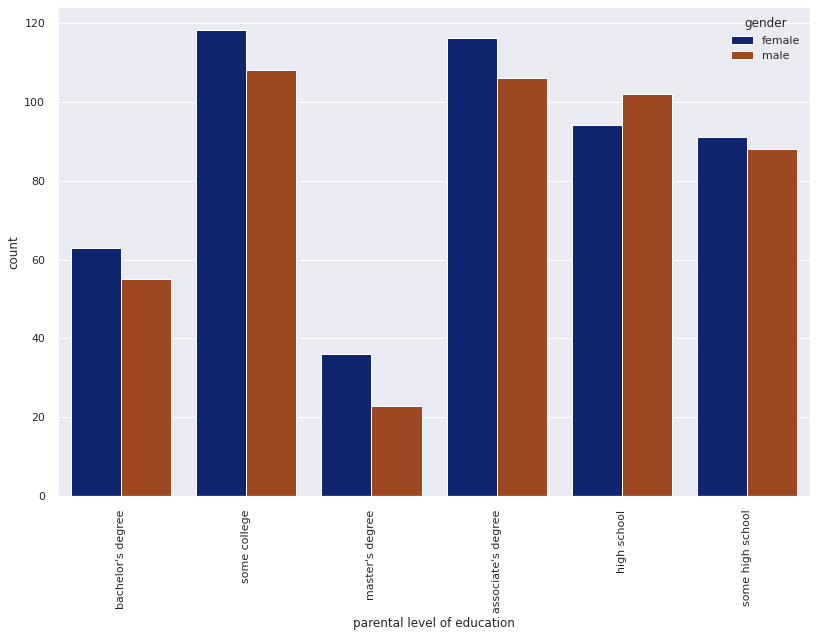

In [ ]:
sns.set_palette('dark')
plt.figure(figsize=(12,9))
sns.countplot(x='parental level of education', hue='gender', data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [ ]:
lunch = df['lunch'].value_counts()

fig = px.bar(y=lunch.values, 
             x=lunch.index, 
             color = lunch.index,
             color_discrete_sequence=px.colors.sequential.dense,
             text=lunch.values,
             title= 'Distribution of Lunch type',
             template= 'plotly_dark')

fig.update_traces(width=0.4)
fig.update_layout(
    xaxis_title="Lunch type",
    yaxis_title="Count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

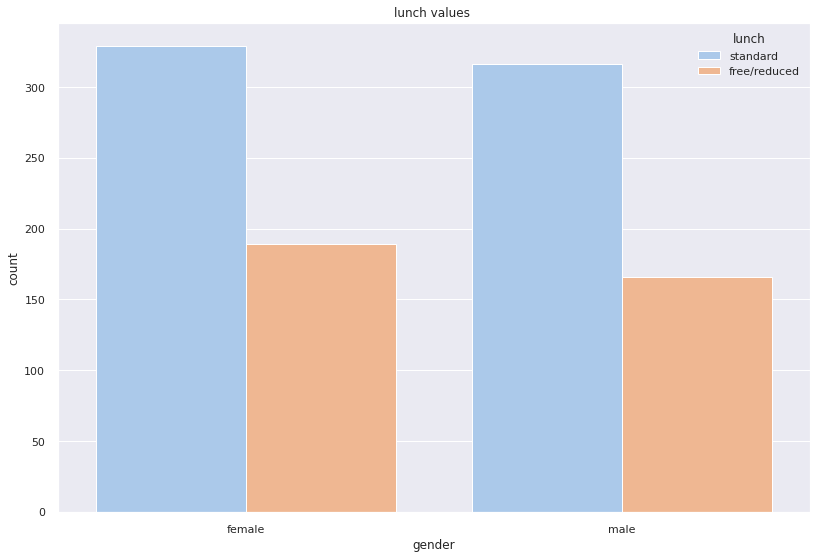

In [ ]:
sns.set_palette('pastel')
plt.figure(figsize=(12,9))
sns.countplot(x='gender', hue='lunch', data=df)
plt.title('lunch values ')
plt.show()

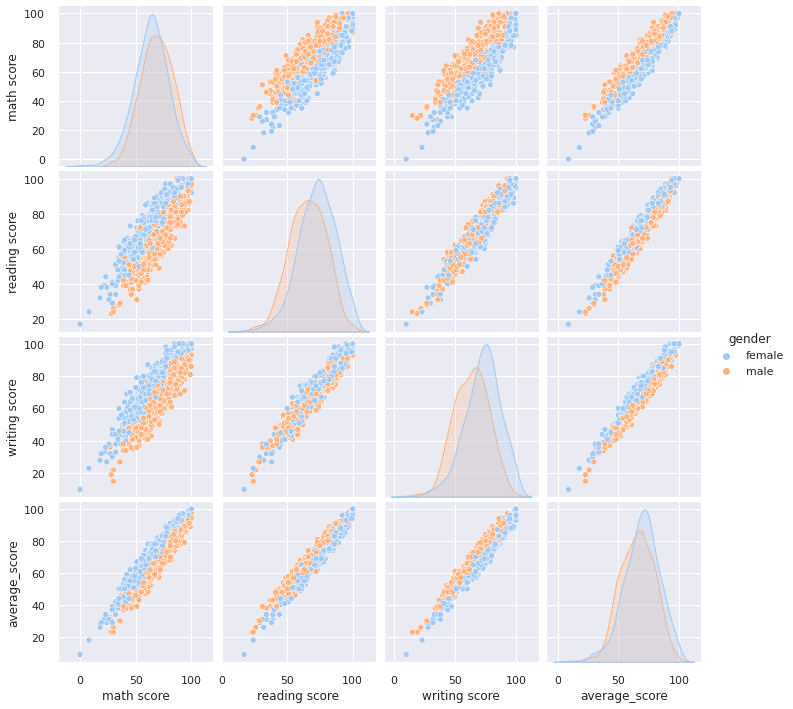

In [ ]:
#This will show relation between two columns with respect to gender
sns.pairplot(df,hue='gender')

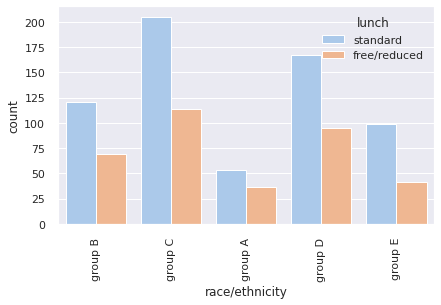

In [ ]:
sns.set_palette('pastel')
sns.countplot(x='race/ethnicity', hue='lunch', data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [ ]:
test=df['test preparation course'].value_counts()
fig=px.treemap(test,
               path=[test.index],
               values=test.values,
               title="Test preparation course distribution",
               color=test.index,
               color_discrete_sequence=px.colors.sequential.PuBuGn,
               template='plotly_dark',
               width=1000, height=500
              )
fig.data[0].customdata = [35.09, 46.13, 4.28 , 14.5]
fig.data[0].texttemplate = '%{label}<br>%{value}<br>%{customdata}%'
percents = np.round((100*gender_df.values / sum(test.values)).tolist(),2)
fig.update_layout(font=dict(size=19,family="Franklin Gothic"))

fig.show()

In [ ]:
gender_mean=df.groupby('gender')[['math score','reading score','writing score']].mean().round(2).T

fig = go.Figure(data=[go.Table(
    header=dict(values=['','Male', 'Female'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='center',
               height=40,
               font_size=20),
    cells=dict(values=[gender_mean.index,
                       gender_mean['male'],
                       gender_mean['female']],
               line_color='darkslategray',
               fill_color='lightcyan',
               align='center',
              height=40,
              font_size= 20))
])

fig.update_layout(width=600, height=400)
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



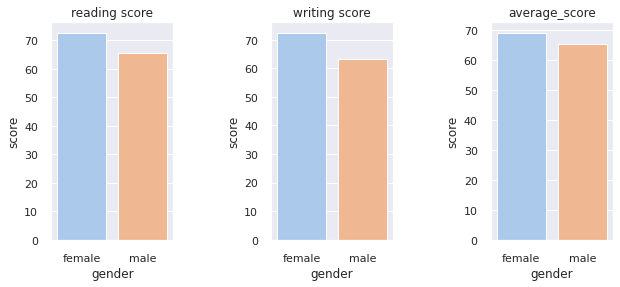

In [ ]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    gender_df = df.groupby("gender")[list(df.columns[-3:])[idx]].describe()
    sns.barplot(gender_df.index, gender_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(df.columns[-3:])[idx])
    
plt.show()

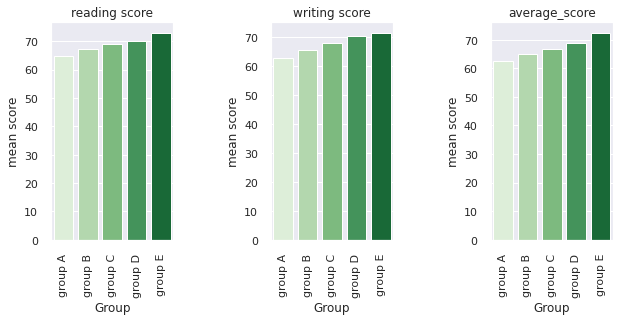

In [ ]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    ethn_df = df.groupby("race/ethnicity")[list(df.columns[-3:])[idx]].mean()
    sns.barplot(x=ethn_df.index, y = ethn_df.values, palette = "Greens")
    plt.xlabel("Group")
    plt.ylabel("mean score")
    plt.xticks(rotation=90)
    plt.title(list(df.columns[-3:])[idx])
plt.show()

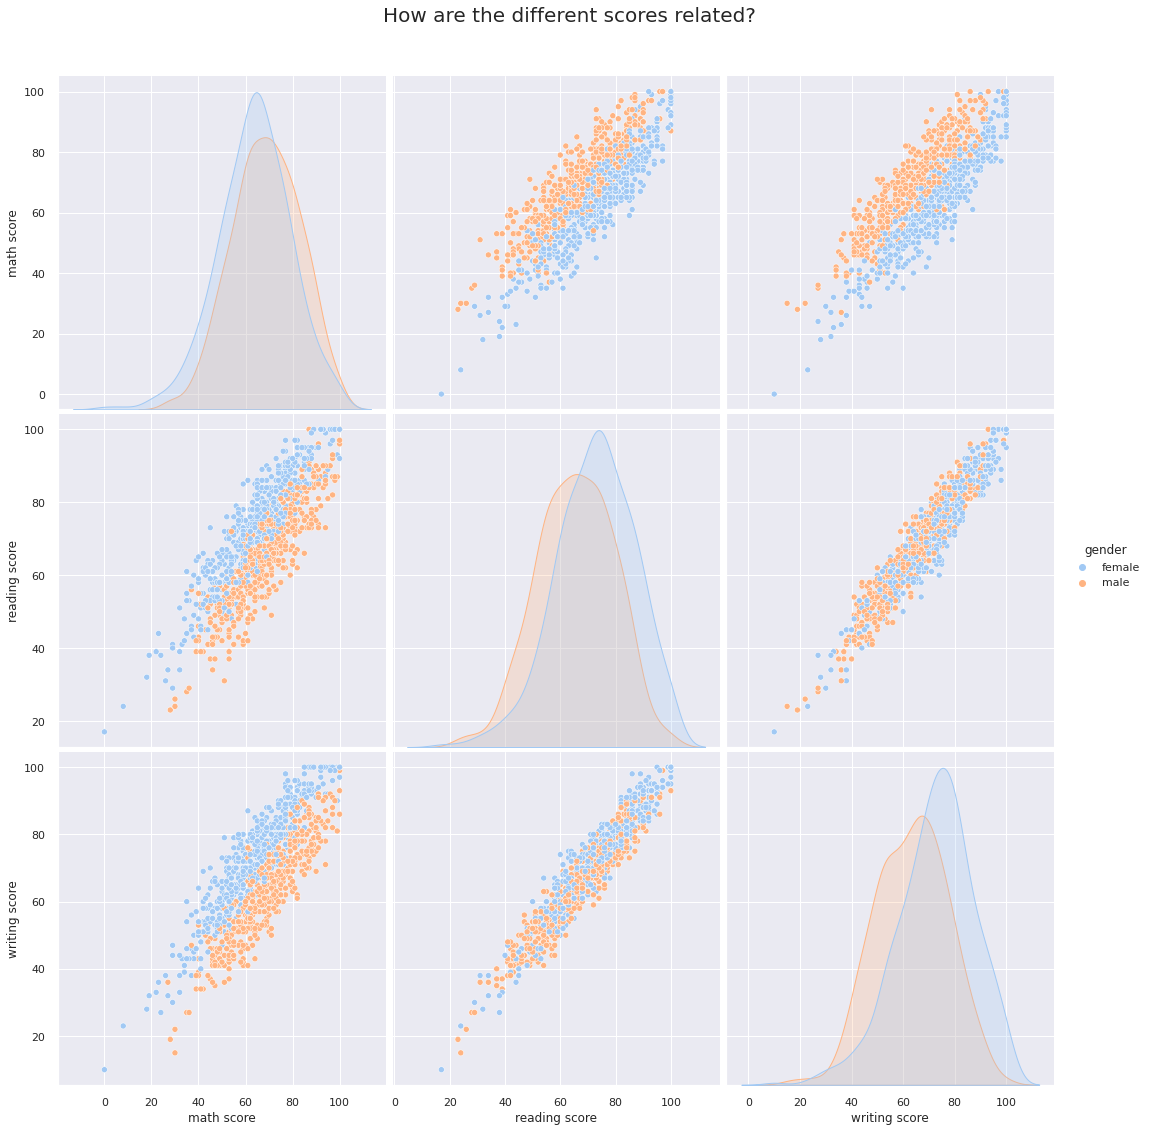

In [ ]:
fig = sns.pairplot(df[["math score", "reading score", "writing score", "gender"]], hue="gender", height=5);
fig.fig.suptitle("How are the different scores related?", size=20, y=1.05);

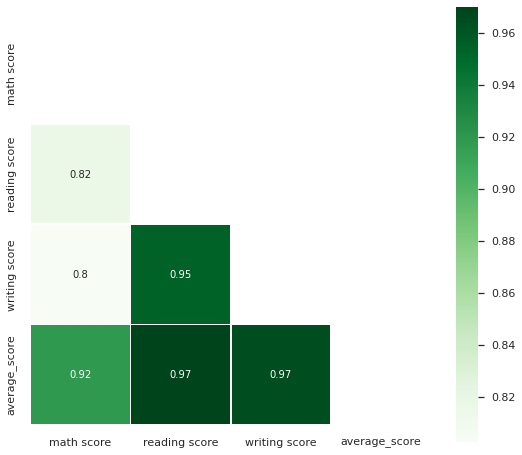

In [ ]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="Greens",annot=True)

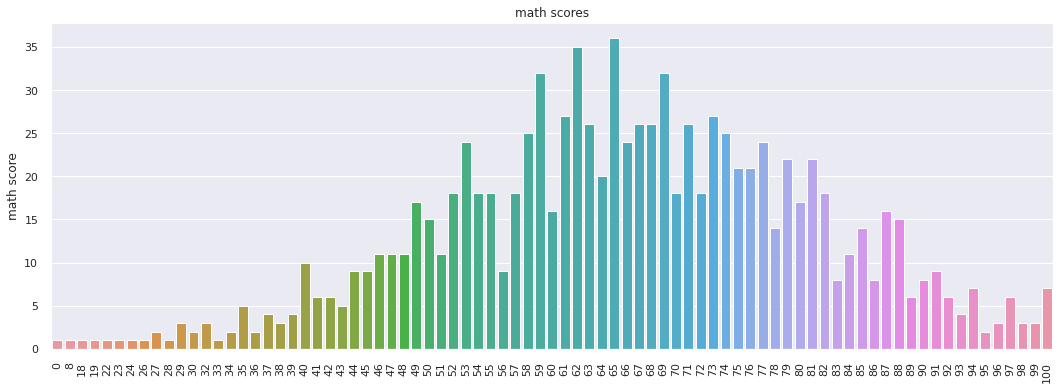

In [ ]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df['math score'].value_counts().index, y=df['math score'].value_counts())
plt.title('math scores')
plt.xticks(rotation=90)
plt.show()

In [ ]:
group_labels = ['math score']
fig1 = px.box(y=df['math score'],template= 'plotly_dark', title = 'Math score')
fig1.update_layout(font = dict(size=17,family="Franklin Gothic"))
fig1.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



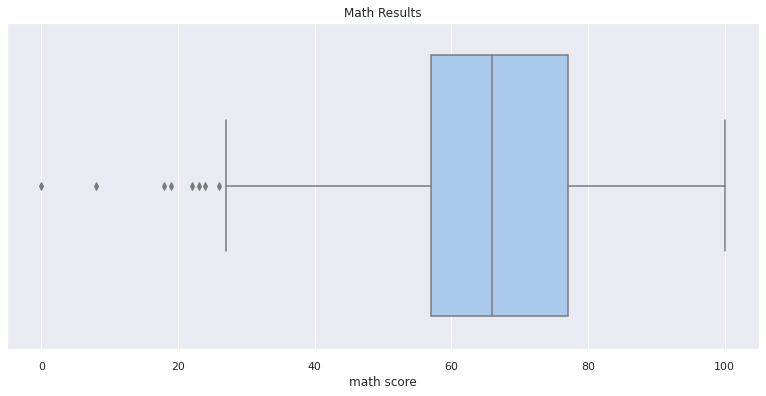

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(df['math score'])
plt.title('Math Results')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



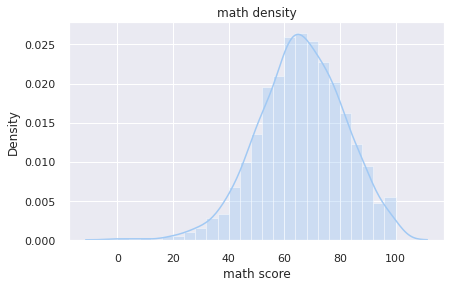

In [ ]:
sns.distplot(df['math score'])
plt.title('math density')
plt.show()

In [ ]:
fig=px.sunburst(df,path=['race/ethnicity','math score'])
fig.show();

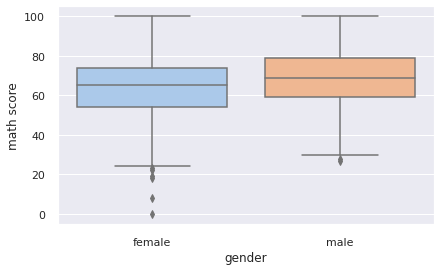

In [ ]:
sns.boxplot(x='gender', y='math score', data=df)
plt.show()

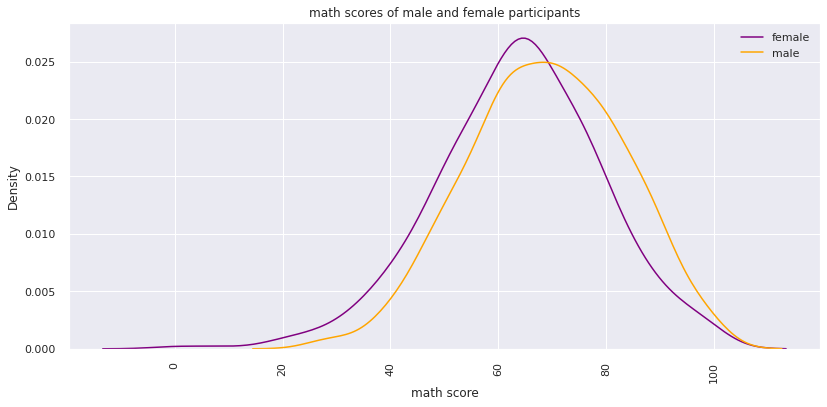

In [ ]:
plt.figure(figsize=(12,6))
sns.kdeplot(df[df['gender']=='female']['math score'], color='purple', label='female')
sns.kdeplot(df[df['gender']=='male']['math score'], color='orange', label='male')
plt.title('math scores of male and female participants')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

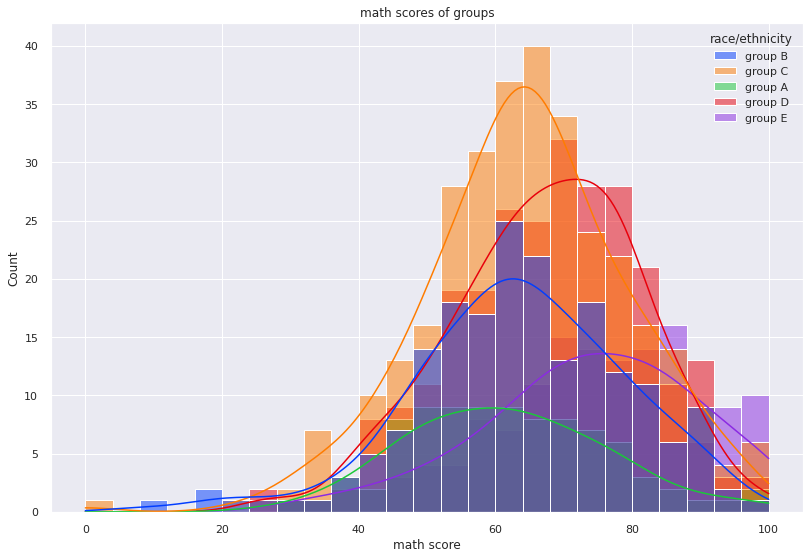

In [ ]:
sns.set_palette('bright') 
plt.figure(figsize=(12,9))
sns.histplot(x='math score', data=df, kde=True, hue='race/ethnicity')
plt.title('math scores of groups')
plt.show()

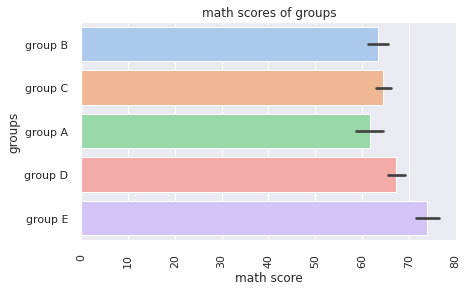

In [ ]:
sns.set_palette('pastel')
sns.barplot(y='race/ethnicity',x='math score',data=df)
plt.title('math scores of groups')
plt.xlabel('math score')
plt.ylabel('groups')
plt.xticks(rotation=90)
plt.show()

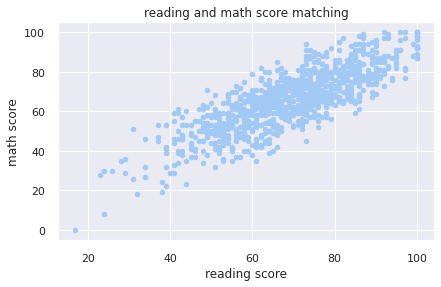

In [ ]:
df.plot(x="reading score", y="math score", kind="scatter")
plt.title('reading and math score matching')
plt.show() 

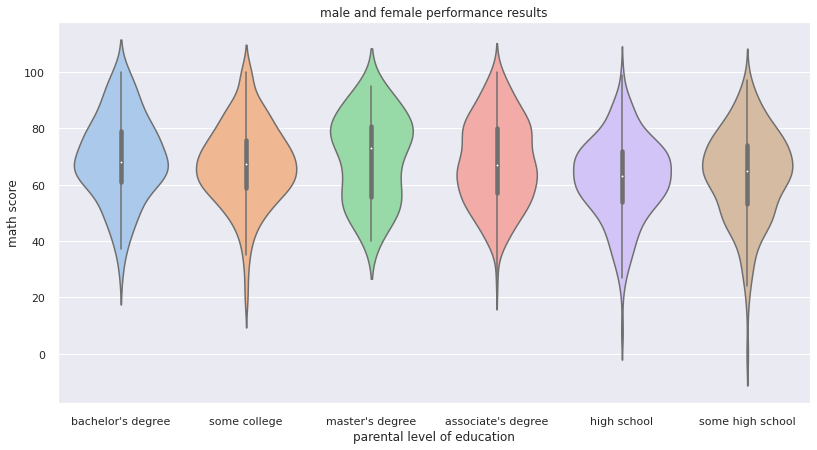

In [ ]:
plt.figure(figsize=(12,7))
sns.violinplot(x=df['parental level of education'],y=df['math score'])
plt.title('male and female performance results')
plt.show()

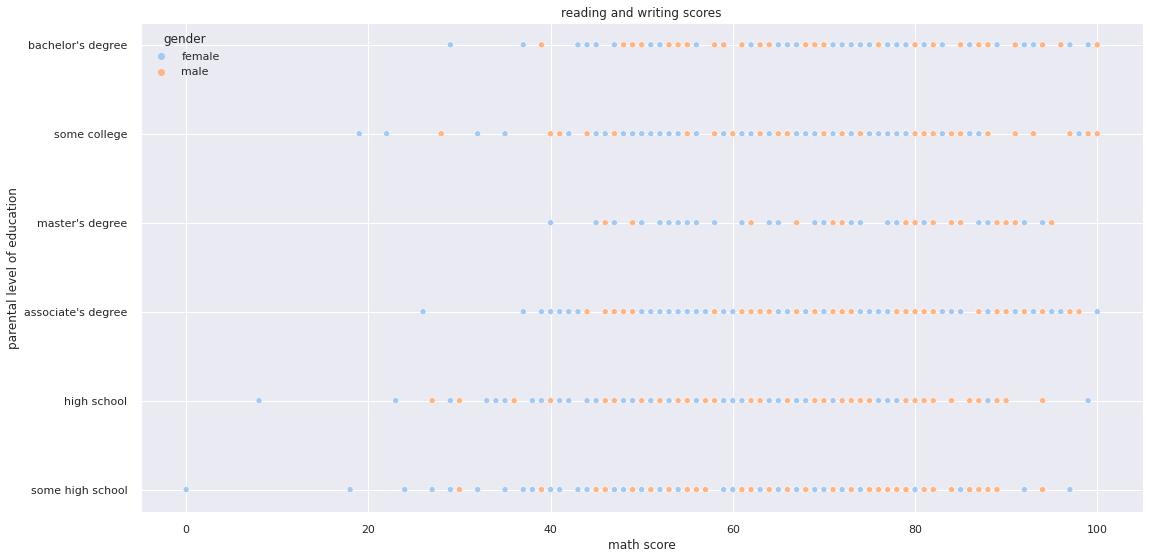

In [ ]:
plt.figure(figsize=(16,9))
sns.scatterplot(x='math score', y='parental level of education', hue='gender', data=df)
plt.title('reading and writing scores')

plt.show()

In [ ]:
fig = px.line(df, y='math score', color='gender')

fig.show()

In [ ]:
fig = px.bar(df, x='math score', y='race/ethnicity', color='gender')

fig.show()

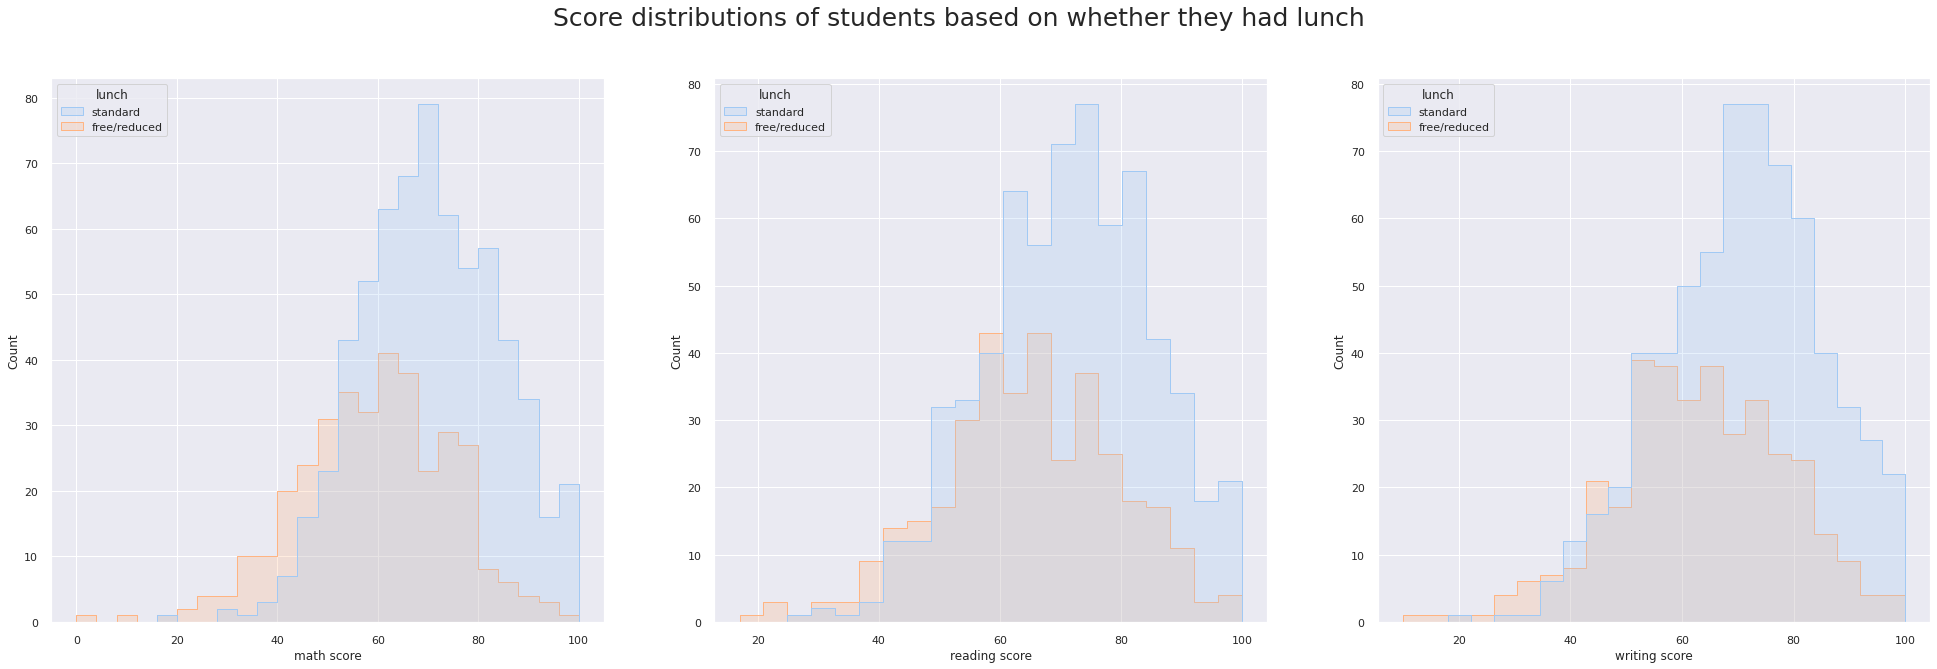

In [ ]:
fig, ax=plt.subplots(ncols=3,figsize=(30,10))

fig.suptitle('Score distributions of students based on whether they had lunch',size=25)

a=sns.histplot(df,x='math score',ax=ax[0], hue='lunch',element='step')

b=sns.histplot(df,x='reading score',ax=ax[1],hue='lunch',element='step')

c=sns.histplot(df,x='writing score',ax=ax[2],hue='lunch',element='step')

sns.move_legend(a, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(b, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(c, "upper left", bbox_to_anchor=(0, 1))

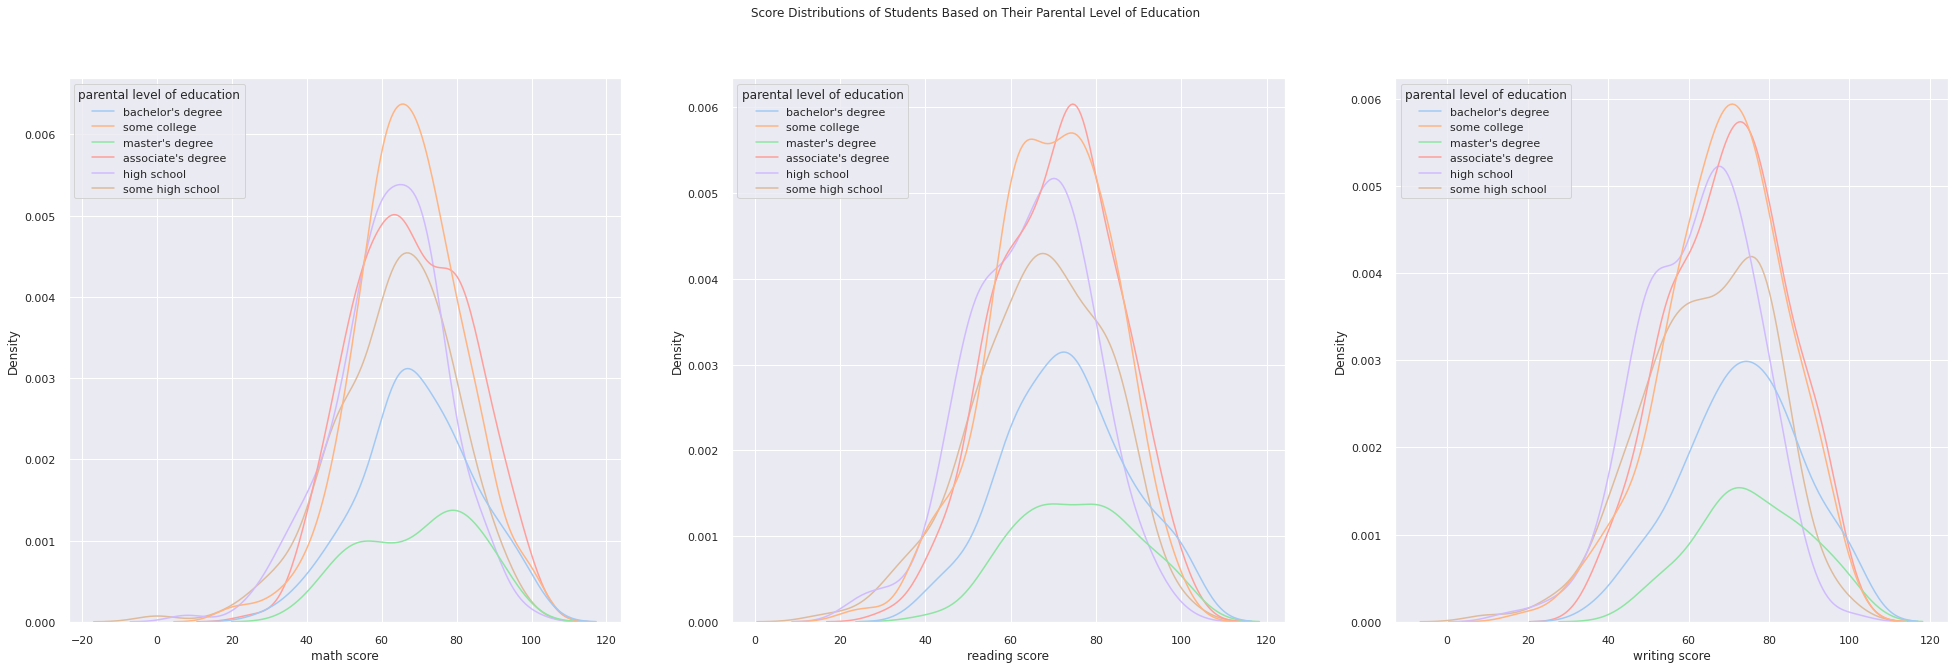

In [ ]:
fig, ax=plt.subplots(ncols=3, figsize=(30,10))

fig.suptitle('Score Distributions of Students Based on Their Parental Level of Education')

a=sns.kdeplot(data=df,x='math score',ax=ax[0], hue='parental level of education')

b= sns.kdeplot(data=df, x='reading score', ax=ax[1], hue='parental level of education')

c= sns.kdeplot(data=df, x='writing score', ax=ax[2], hue='parental level of education')

sns.move_legend(a, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(b, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(c, "upper left", bbox_to_anchor=(0, 1))

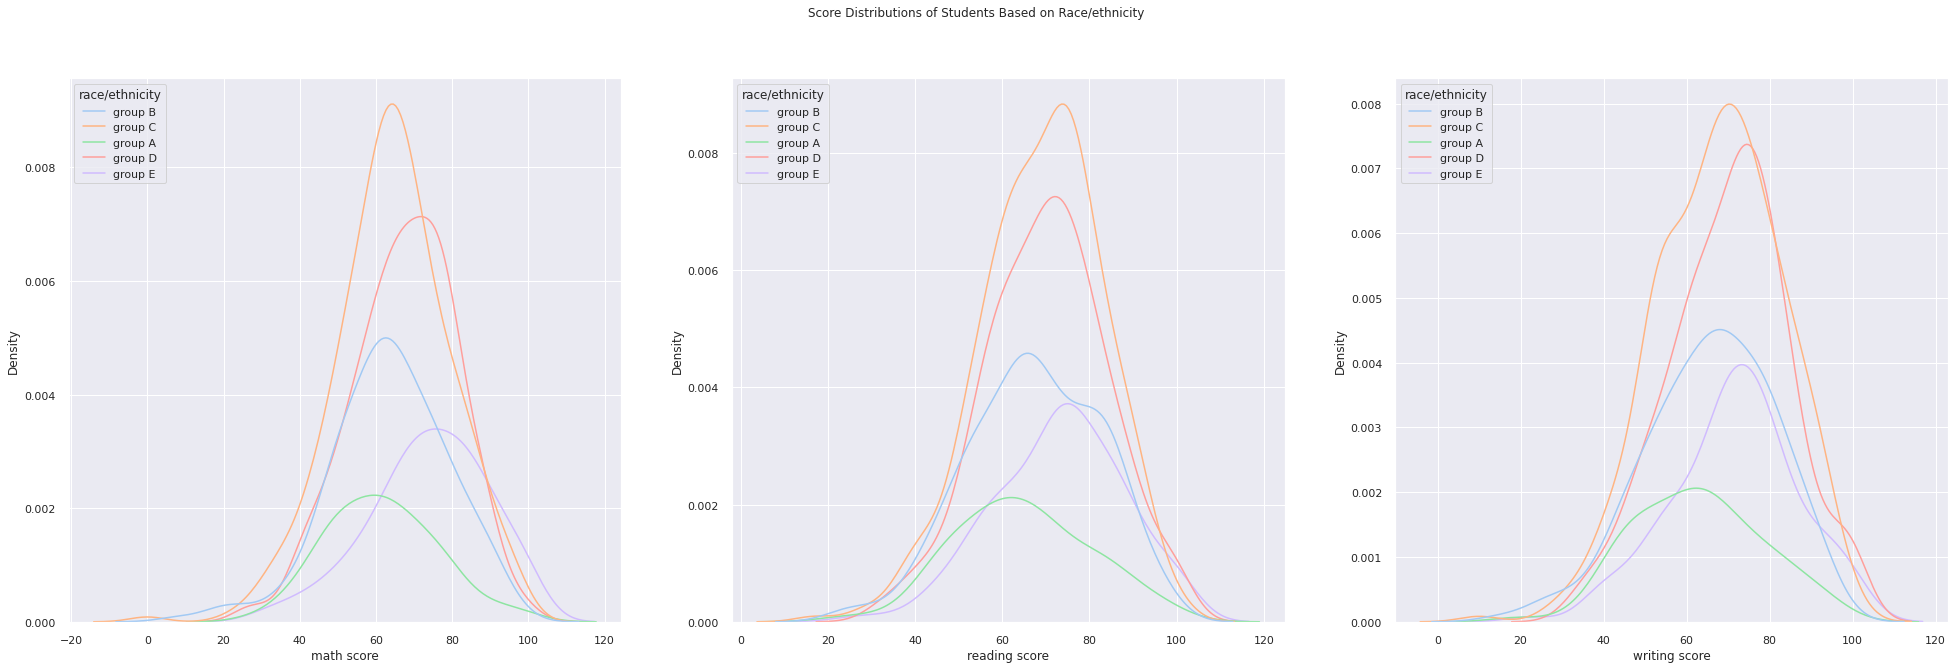

In [ ]:
fig, ax=plt.subplots(ncols=3, figsize=(30,10))

fig.suptitle('Score Distributions of Students Based on Race/ethnicity')

a=sns.kdeplot(data=df,x='math score',ax=ax[0], hue='race/ethnicity')

b= sns.kdeplot(data=df, x='reading score', ax=ax[1], hue='race/ethnicity')

c= sns.kdeplot(data=df, x='writing score', ax=ax[2], hue='race/ethnicity')

sns.move_legend(a, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(b, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(c, "upper left", bbox_to_anchor=(0, 1))

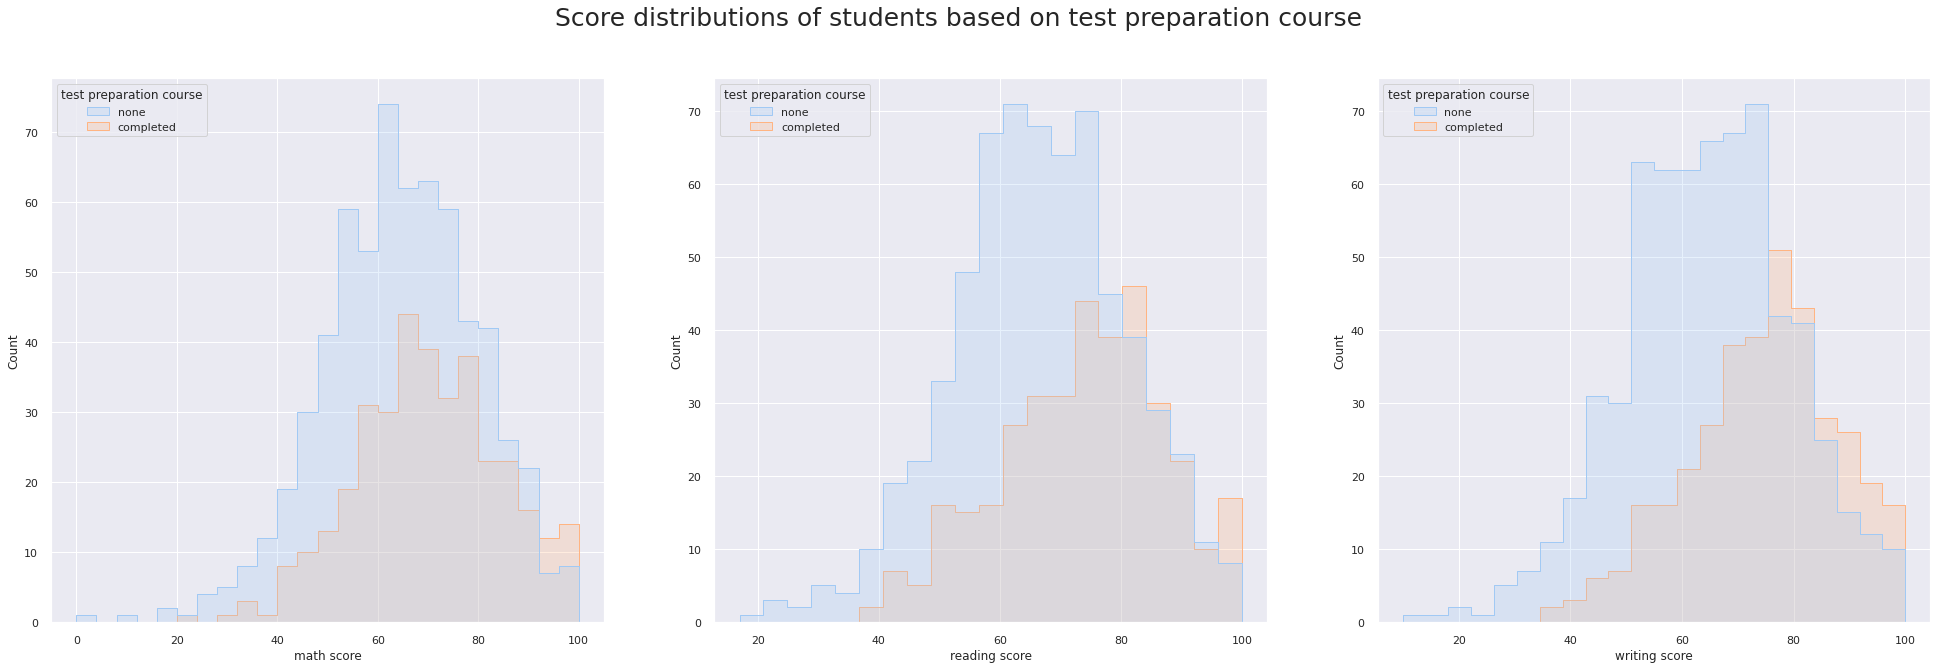

In [ ]:
fig, ax=plt.subplots(ncols=3,figsize=(30,10))

fig.suptitle('Score distributions of students based on test preparation course',size=25)

a=sns.histplot(df,x='math score',ax=ax[0], hue='test preparation course',element='step')

b=sns.histplot(df,x='reading score',ax=ax[1],hue='test preparation course',element='step')

c=sns.histplot(df,x='writing score',ax=ax[2],hue='test preparation course',element='step')

sns.move_legend(a, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(b, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(c, "upper left", bbox_to_anchor=(0, 1))

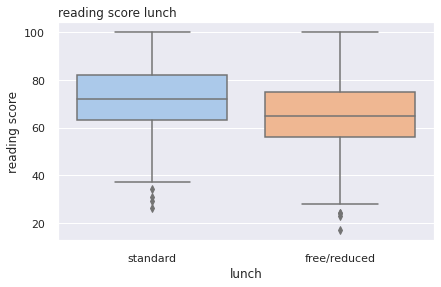

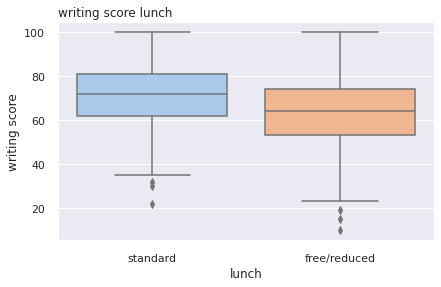

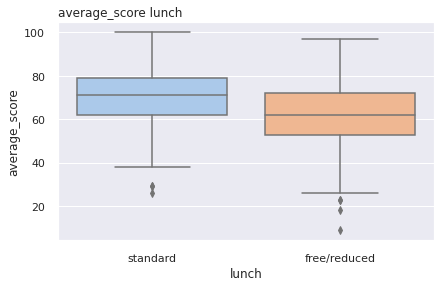

In [ ]:
for item in df.columns[-3:]:
    sns.boxplot(x=df["lunch"], y=df[item])
    plt.title(item+" lunch", loc="left")
    plt.show()

# **Performance & Classification**

In [ ]:
from IPython.core.display import HTML

#Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
def multi_table(table_list):
        return HTML('<table><tr style="background-color:white;">' +  ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +'</tr></table>')
    

In [ ]:
nunique_df={var:pd.DataFrame(df[var].value_counts())
           for var in {'race/ethnicity', 'parental level of education', 'lunch',
                       'test preparation course','gender'}}

multi_table([nunique_df['race/ethnicity'],nunique_df['parental level of education'],nunique_df['lunch'],nunique_df['test preparation course'],nunique_df['gender']])

,race/ethnicity
group C,319
group D,262
group B,190
group E,140
group A,89
,parental level of education
some college,226
associate's degree,222
high school,196
some high school,179


In [ ]:
score_df=df
score_df.rename(columns={"race/ethnicity":"ethnicity","parental level of education":"parent_education"
                    ,"math score":"math","reading score":"reading","writing score":"writing",
                    "test preparation course":"pre"},inplace=True)
score_df.head()

,gender,ethnicity,parent_education,lunch,pre,math,reading,writing,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72
1,female,group C,some college,standard,completed,69,90,88,82
2,female,group B,master's degree,standard,none,90,95,93,92
3,male,group A,associate's degree,free/reduced,none,47,57,44,49
4,male,group C,some college,standard,none,76,78,75,76


In [ ]:
labelencoder = LabelEncoder()
train_df = score_df.copy()
train_df["parent_education"] = labelencoder.fit_transform(train_df["parent_education"])
train_df["pre"] = labelencoder.fit_transform(train_df["pre"])
train_df["lunch"] = labelencoder.fit_transform(train_df["lunch"])
train_df.head()

,gender,ethnicity,parent_education,lunch,pre,math,reading,writing,average_score
0,female,group B,1,1,1,72,72,74,72
1,female,group C,4,1,0,69,90,88,82
2,female,group B,3,1,1,90,95,93,92
3,male,group A,0,0,1,47,57,44,49
4,male,group C,4,1,1,76,78,75,76


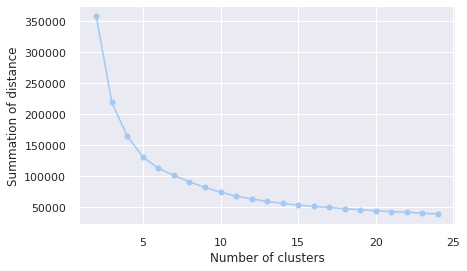

In [ ]:
kmeans_dis = list()
for idx in range(2, 25):  
    kmeans = KMeans(init = "k-means++", n_clusters = idx, n_init = 20)
    kmeans.fit_transform(train_df.iloc[:, 2:])
    kmeans_dis.append(kmeans.inertia_)
plt.plot(list(range(2,25)), kmeans_dis, marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("Summation of distance")
plt.show()

In [ ]:
kmeans = KMeans(init = "k-means++", n_clusters = 8)
kmeans.fit_transform(train_df.iloc[:, 2:])
kmeans_label = kmeans.labels_
score_df["classification"] = kmeans_label
score_df.head(10)

,gender,ethnicity,parent_education,lunch,pre,math,reading,writing,average_score,classification
0,female,group B,bachelor's degree,standard,none,72,72,74,72,0
1,female,group C,some college,standard,completed,69,90,88,82,3
2,female,group B,master's degree,standard,none,90,95,93,92,2
3,male,group A,associate's degree,free/reduced,none,47,57,44,49,1
4,male,group C,some college,standard,none,76,78,75,76,5
5,female,group B,associate's degree,standard,none,71,83,78,77,5
6,female,group B,some college,standard,completed,88,95,92,91,2
7,male,group B,some college,free/reduced,none,40,43,39,40,7
8,male,group D,high school,free/reduced,completed,64,64,67,65,4
9,female,group B,high school,free/reduced,none,38,60,50,49,1


In [ ]:
class_df = score_df.groupby("classification")[score_df.columns[-5:-1]].mean()
class_df

,math,reading,writing,average_score
classification,,,,
0,73.459854,68.985401,67.218978,69.591241
1,48.045113,51.007519,48.601504,48.872180
2,89.150538,92.903226,92.720430,91.258065
3,81.572368,82.263158,81.026316,81.289474
4,59.246835,67.822785,67.778481,64.620253
5,68.262069,77.972414,77.689655,74.337931
6,58.600000,58.186207,56.724138,57.496552
7,32.135135,35.972973,33.594595,33.567568


In [ ]:
class_df["total_ave_score"] = (class_df.math + class_df.reading + class_df.writing)/3
rank = class_df["total_ave_score"].sort_values(ascending = False)
rank.index

Int64Index([2, 3, 5, 0, 4, 6, 1, 7], dtype='int64', name='classification')

In [ ]:
rank

classification
2    91.591398
3    81.620614
5    74.641379
0    69.888078
4    64.949367
6    57.836782
1    49.218045
7    33.900901
Name: total_ave_score, dtype: float64

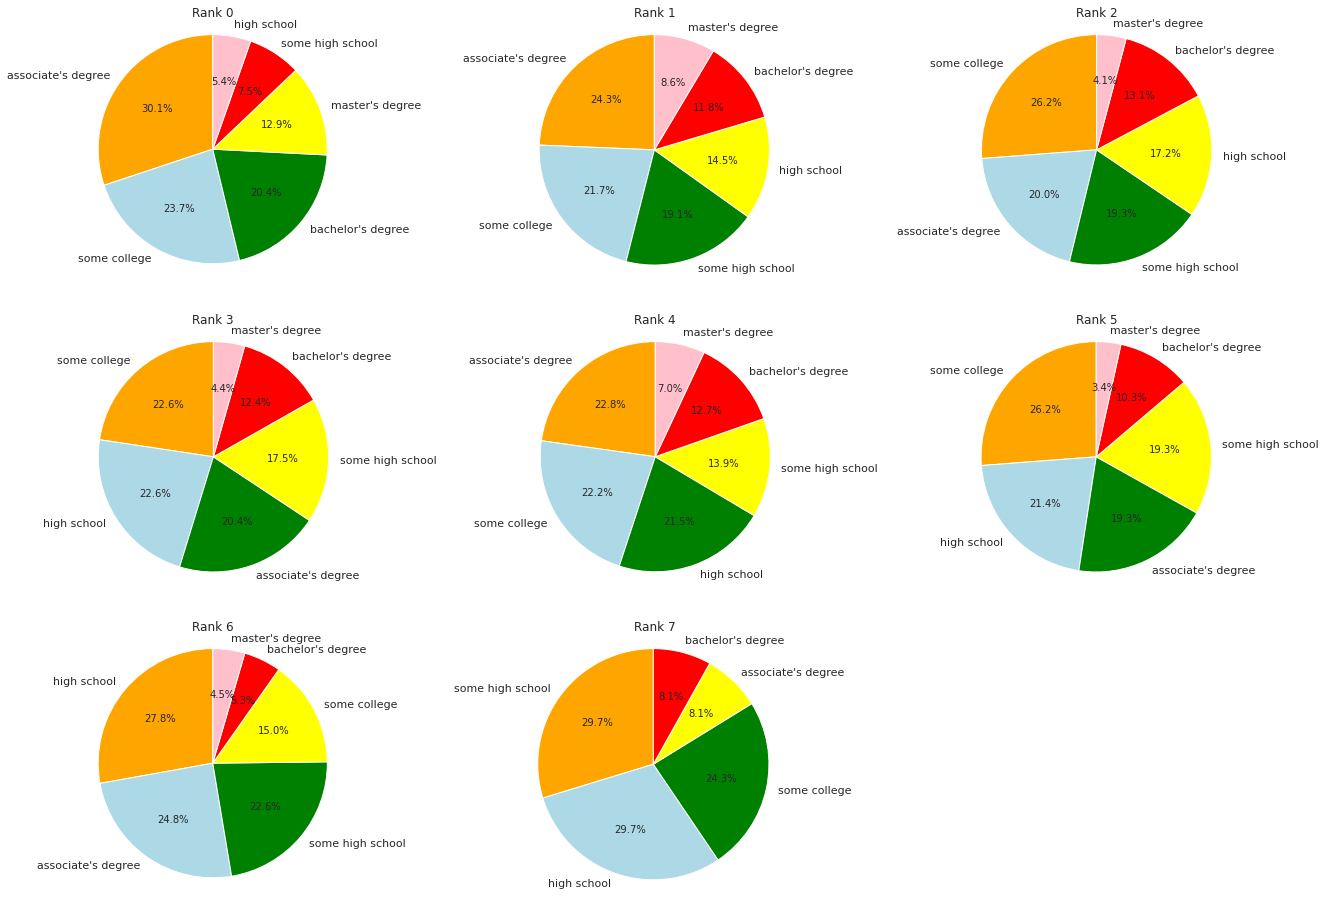

In [ ]:
def plot_pie_chart(column):
    fig, ax = plt.subplots(figsize=(20,16))
    color = ["orange","lightblue","green","yellow","red","pink","brown","gray"]
    for idx in range(8):
        plt.subplot(3, 3, idx+1)
        num = "class"+ str(idx)
        num = score_df[score_df["classification"]==rank.index[idx]]
        percentage_of_parent_edu = num[column].value_counts()
        percentage_of_parent_edu.sort_index()
        label = percentage_of_parent_edu.index
        value = percentage_of_parent_edu.values
        plt.pie(value, labels = label, autopct = "%1.1f%%",
                startangle=90, radius = 4, colors = color[:len(label)])
        plt.axis("equal")
        plt.title("Rank "+str(idx))
    plt.show()
plot_pie_chart("parent_education")

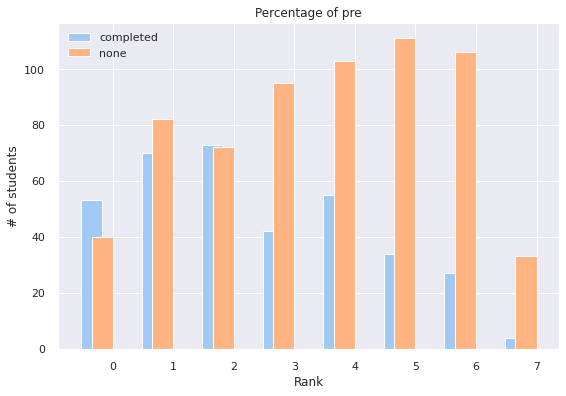

In [ ]:
def plot_bar_chart(column):
    fig, ax = plt.subplots(figsize=(8,6))
    index_dict = dict()
    width = 0.35
    ind = np.arange(8)
    for idx in range(8):
        num = "class"+ str(idx)
        num = score_df[score_df["classification"]==rank.index[idx]]
        percentage_of_column = num[column].value_counts()
        percentage_of_column = percentage_of_column.sort_index()
        for key in percentage_of_column.index:
            if key not in index_dict.keys():
                index_dict[key] = []
                index_dict[key].append(percentage_of_column[key]) #/percentage_of_column.values.sum())
            else:
                index_dict[key].append(percentage_of_column[key]) #/percentage_of_column.values.sum())
   
    percentage_of_column = score_df[score_df["classification"]==rank.index[4]][column].value_counts().sort_index()
    for i in range(len(percentage_of_column.index)):
        rects = ax.bar(ind - width/(i+1), 
                       index_dict[percentage_of_column.index[i]],
                       width, label=percentage_of_column.index[i])

    ax.set_xlabel('Rank')
    ax.set_ylabel('# of students')
    ax.set_title("Percentage of " + column)
    ax.set_xticks(ind)
    ax.legend()
    plt.show()
    
plot_bar_chart("pre") 

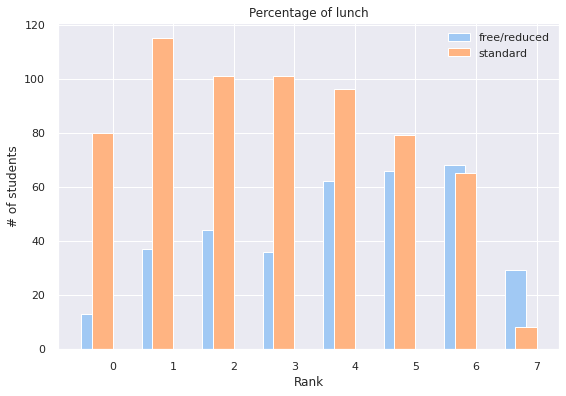

In [ ]:
plot_bar_chart("lunch")

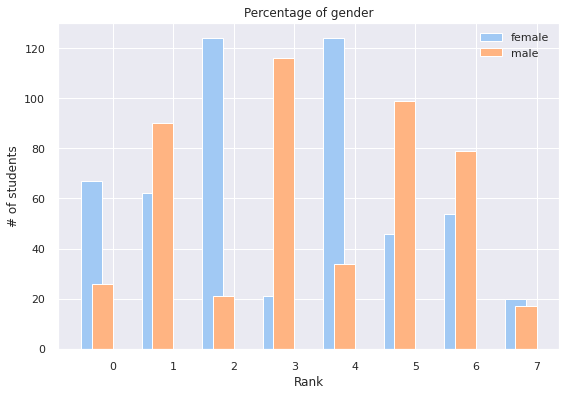

In [ ]:
plot_bar_chart("gender")

# **Modeling & Prediction**

In [ ]:
#Pre-Processing the Data
# Total number of male and female in a dataset
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [ ]:
#Converting string to numeric data
#gender
df=df.replace({'male':1,'female':0})
#race/ethinic group
df= df.replace({'group A':0, 'group B':1, 'group C':2, 'group D':3, 'group E':4})
#lunch
df= df.replace({'free/reduced':0, 'standard':1})
#test preparation course
df= df.replace({'none':0, 'completed':1})
#parents education
df= df.replace({'some college':3, "associate's degree":2, 'high school':4, 
                 'some high school':5, "bachelor's degree":1, "master's degree":0})

In [ ]:
# Printing the dataset shape
print ("Dataset Length: ", len(df))
print("Dataset Shape",df.shape)

Dataset Length:  1000
Dataset Shape (1000, 10)


In [ ]:
#create average score colum
df['average_score']=(df['math']
                +df['reading']+df['writing'])//3
df.average_score.value_counts()
df.head()

,gender,ethnicity,parent_education,lunch,pre,math,reading,writing,average_score,classification
0,0,1,1,1,0,72,72,74,72,0
1,0,2,3,1,1,69,90,88,82,3
2,0,1,0,1,0,90,95,93,92,2
3,1,0,2,0,0,47,57,44,49,1
4,1,2,3,1,0,76,78,75,76,5


In [ ]:
# X and y -dependent variable and independent variable
y=df['average_score'] #independent variables
#dependent variables
X=df[df.columns.difference(['average_score'])]
X.head()

,classification,ethnicity,gender,lunch,math,parent_education,pre,reading,writing
0,0,1,0,1,72,1,0,72,74
1,3,2,0,1,69,3,1,90,88
2,2,1,0,1,90,0,0,95,93
3,1,0,1,0,47,2,0,57,44
4,5,2,1,1,76,3,0,78,75


In [ ]:
labels=['Fail','Pass']
bins=[0,75,100]
y=pd.cut(y,bins,labels=labels)
y.head()

0    Fail
1    Pass
2    Pass
3    Fail
4    Pass
Name: average_score, dtype: category
Categories (2, object): ['Fail' < 'Pass']

In [ ]:
#Feature Scaling
#Normalization and Standardization of Data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
cols=X.columns
minmax_scale=scaler.fit(X[cols])
X[cols]=pd.DataFrame(minmax_scale.transform(X[cols]),columns=cols)
X.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,classification,ethnicity,gender,lunch,math,parent_education,pre,reading,writing
0,0.000000,0.25,0.0,1.0,0.72,0.2,0.0,0.662651,0.711111
1,0.428571,0.50,0.0,1.0,0.69,0.6,1.0,0.879518,0.866667
2,0.285714,0.25,0.0,1.0,0.90,0.0,0.0,0.939759,0.922222
3,0.142857,0.00,1.0,0.0,0.47,0.4,0.0,0.481928,0.377778
4,0.714286,0.50,1.0,1.0,0.76,0.6,0.0,0.734940,0.722222


In [ ]:
#Splitting the dataset into test-train model.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                        y,test_size=0.3,random_state=42)
print("Length of training Dataset: ",len(y_train))
print("Length of testing Dataset: ",len(y_test))

Length of training Dataset:  700
Length of testing Dataset:  300


In [ ]:
y_train.head(),y_test.head()

(541    Pass
 440    Fail
 482    Fail
 422    Fail
 778    Pass
 Name: average_score, dtype: category
 Categories (2, object): ['Fail' < 'Pass'], 521    Pass
 737    Fail
 740    Fail
 660    Fail
 411    Pass
 Name: average_score, dtype: category
 Categories (2, object): ['Fail' < 'Pass'])

In [ ]:
#decision tree model
model=DecisionTreeClassifier (max_leaf_nodes=None,random_state=42)
model.fit (X_train,y_train) # Training the model
score=model.score (X_test,y_test) # Test accuracy and performance
print('Accuracy score of Decision Tree Classifier: %f'% (score*100))
predict=model.predict(X_test)
scores=cross_val_score(model,X,y,cv=10)
print("\nDecision Tree Classifier: "+"cross_val_score: "+
      str(np.mean(scores)*100))

accuracy=accuracy_score(y_test,predict)


precision=precision_score(y_test,predict,average='micro')


recall=recall_score(y_test,predict,average='micro')


precision=precision_score(y_test,predict,average='micro')


f1=f1_score(y_test,predict,average='micro')


cm=confusion_matrix(y_test,predict)
print('\nConfusion matrix\n',(cm))

print('\nClassification Report:')
print(classification_report(y_test,predict))

Accuracy score of Decision Tree Classifier: 96.000000

Decision Tree Classifier: cross_val_score: 97.5

Confusion matrix
 [[212   2]
 [ 10  76]]

Classification Report:
              precision    recall  f1-score   support

        Fail       0.95      0.99      0.97       214
        Pass       0.97      0.88      0.93        86

    accuracy                           0.96       300
   macro avg       0.96      0.94      0.95       300
weighted avg       0.96      0.96      0.96       300



In [ ]:
#To predict if the student fail or pass 
pred=np.array(X_test.loc[522,:]).reshape(1,-1)
prediction=model.predict(pred)[0]
print("You %s "% prediction)

You Fail 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [ ]:
#logistic regression
model=LogisticRegression(solver='liblinear', C=1.0,random_state=0)
model.fit(X_train,y_train)
#prediction on test dataset
#y_pred=model.
y_pred=model.predict(X_test)
predictor=model.score(X_test,y_test)
#print(y_pred)
print("Accuracy of the Logistic Regression model:  %f"%(predictor*100))

c1 =confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix: \n",c1)

print("\nclassification_report:\n")
print(classification_report(y_test, y_pred))

Accuracy of the Logistic Regression model:  91.666667

Confusion Matrix: 
 [[210   4]
 [ 21  65]]

classification_report:

              precision    recall  f1-score   support

        Fail       0.91      0.98      0.94       214
        Pass       0.94      0.76      0.84        86

    accuracy                           0.92       300
   macro avg       0.93      0.87      0.89       300
weighted avg       0.92      0.92      0.91       300



In [ ]:
y_pred

array(['Pass', 'Fail', 'Fail', 'Fail', 'Pass', 'Fail', 'Fail', 'Fail',
       'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Pass', 'Fail',
       'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail',
       'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail',
       'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Pass', 'Fail',
       'Pass', 'Fail', 'Fail', 'Fail', 'Pass', 'Fail', 'Fail', 'Fail',
       'Pass', 'Pass', 'Fail', 'Fail', 'Pass', 'Fail', 'Fail', 'Fail',
       'Pass', 'Fail', 'Pass', 'Pass', 'Fail', 'Pass', 'Pass', 'Fail',
       'Pass', 'Fail', 'Fail', 'Fail', 'Fail', 'Pass', 'Fail', 'Pass',
       'Fail', 'Fail', 'Fail', 'Fail', 'Pass', 'Fail', 'Fail', 'Fail',
       'Fail', 'Fail', 'Pass', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail',
       'Pass', 'Fail', 'Pass', 'Pass', 'Fail', 'Fail', 'Fail', 'Fail',
       'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail',
       'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Pass',
      

In [ ]:
#linear regression
# X and y -dependent variable and independent variable
y=df['average_score'] #independent variables
#dependent variables
X=df[df.columns.difference(['average_score'])]
#X.head()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)
reg=LinearRegression().fit(X_train,y_train)

In [ ]:
reg.score(X_train,y_train)

0.99964494490407

In [ ]:
reg.score(X_test,y_test)

0.9996272452536028

In [ ]:
 #Testing Underfitting and Overfitting
from sklearn import linear_model
lasso_reg= linear_model.Lasso(alpha=50, 
                    max_iter=100, tol=0.1)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
lasso_reg.score(X_test,y_test)

0.9430849893691993

In [ ]:
lasso_reg.score(X_train,y_train)

0.9450048553642729

In [ ]:
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [ ]:
ridge_reg.score(X_test,y_test)

0.9996271577993269

In [ ]:
ridge_reg.score(X_train,y_train)

0.999644906845559

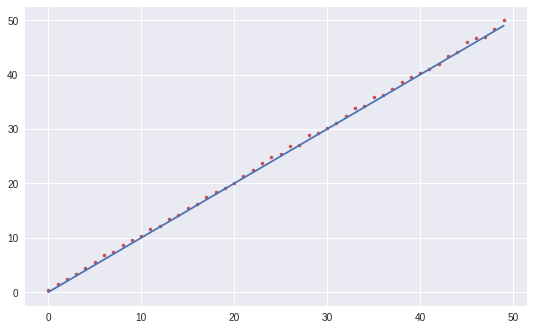

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import random
def f(m, X, c):
#"""Linear regression"""
    return [m * x + c for x in X]
X = [i for i in range(50)]
y = [x + random.random() for x in X]
m, c = 1, 0
y_hat = f(m, X, c)
plt.plot(X, y, '.', c='r')
plt.plot(X, y_hat)
plt.show()

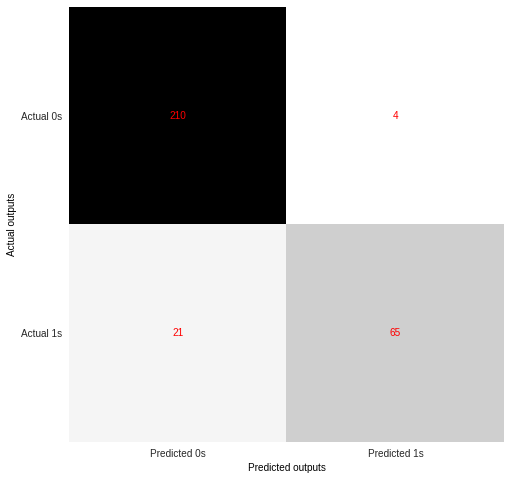

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8)) 
ax.imshow(c1)
ax.grid(False) 
ax.set_xlabel('Predicted outputs', fontsize=10, color='black') 
ax.set_ylabel('Actual outputs', fontsize=10, color='black')
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s', 'Actual 1s')) 
ax.set_ylim(1.5, -0.5)
for i in range(2): 
    for j in range(2): 
        ax.text(j, i, c1[i, j], ha='center', va='center', color='red') 
plt.show()

In [ ]:
#random forrest
y=df['average_score'] #independent variables
#dependent variables
X=df[df.columns.difference(['average_score'])]
labels=['Fail','Pass']
bins=[0,75,100] #range 0>75 , 75>100
y=pd.cut(y,bins,labels=labels)

In [ ]:
scaler=MinMaxScaler()
cols=X.columns
minmax_scale=scaler.fit(X[cols])
X[cols]=pd.DataFrame(minmax_scale.transform(X[cols]),
                columns=cols)
X.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,classification,ethnicity,gender,lunch,math,parent_education,pre,reading,writing
0,0.000000,0.25,0.0,1.0,0.72,0.2,0.0,0.662651,0.711111
1,0.428571,0.50,0.0,1.0,0.69,0.6,1.0,0.879518,0.866667
2,0.285714,0.25,0.0,1.0,0.90,0.0,0.0,0.939759,0.922222
3,0.142857,0.00,1.0,0.0,0.47,0.4,0.0,0.481928,0.377778
4,0.714286,0.50,1.0,1.0,0.76,0.6,0.0,0.734940,0.722222


In [ ]:
y=y.replace({'Fail':0, 'Pass':1})

In [ ]:
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                y, test_size=0.30, random_state=66)
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [ ]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[212   0]
 [  2  86]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       212
           1       1.00      0.98      0.99        88

    accuracy                           0.99       300
   macro avg       1.00      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



=== All AUC Scores ===
[0.99951433 1.         1.         0.99902865 0.99809524 0.99809524
 0.99857143 1.         0.99904762 1.        ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9992352505839636


In [ ]:
# Split the data into training and testing sets
train_features, test_features,train_labels, test_labels=train_test_split(X, 
                                y, test_size = 0.30, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (700, 9)
Training Labels Shape: (700,)
Testing Features Shape: (300, 9)
Testing Labels Shape: (300,)


In [ ]:
feature_list = list(df.columns)

In [ ]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature,
    round(importance, 2)) for feature,
                importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances,
                        key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair))
                         for pair in feature_importances];

Variable: writing              Importance: 0.75
Variable: pre                  Importance: 0.16
Variable: average_score        Importance: 0.06
Variable: gender               Importance: 0.02
Variable: ethnicity            Importance: 0.0
Variable: parent_education     Importance: 0.0
Variable: lunch                Importance: 0.0
Variable: math                 Importance: 0.0
Variable: reading              Importance: 0.0


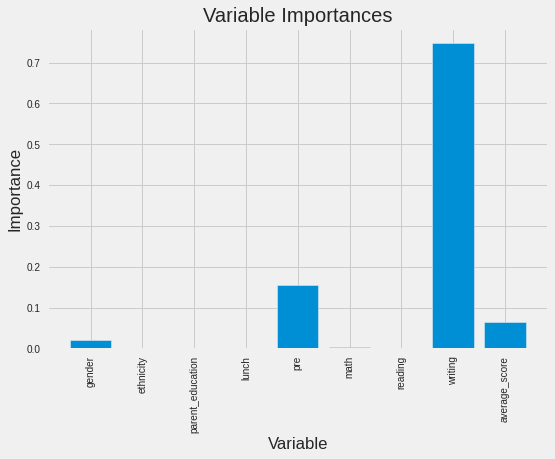

In [ ]:
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable'); plt.title('Variable Importances');

Text(0, 0.5, 'Distance')

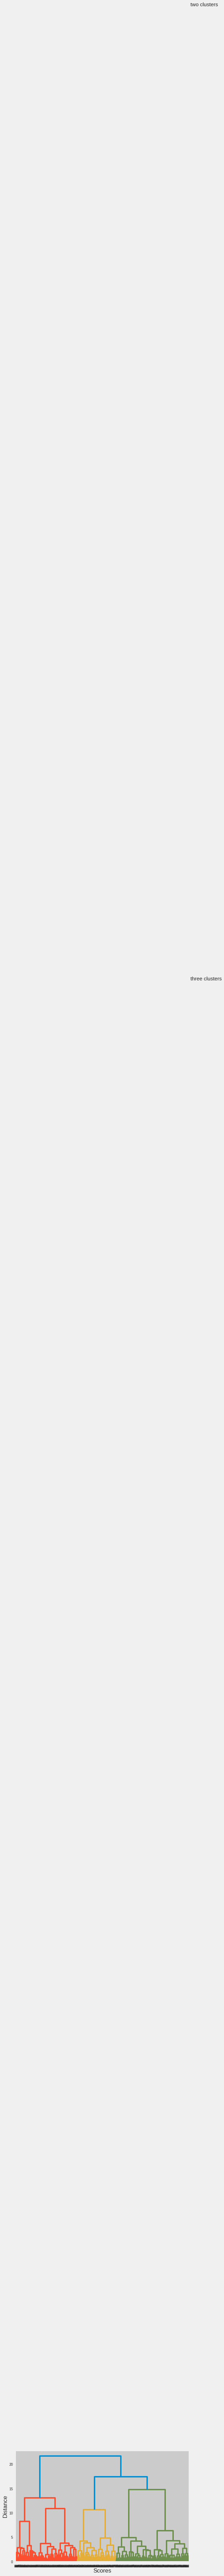

In [ ]:
Z=linkage(X,'ward')
dendrogram(Z)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [525, 525], '--', c='k')
ax.plot(bounds, [325, 325], '--', c='k')
ax.text(bounds[1], 525, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 325, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Scores")
plt.ylabel("Distance")

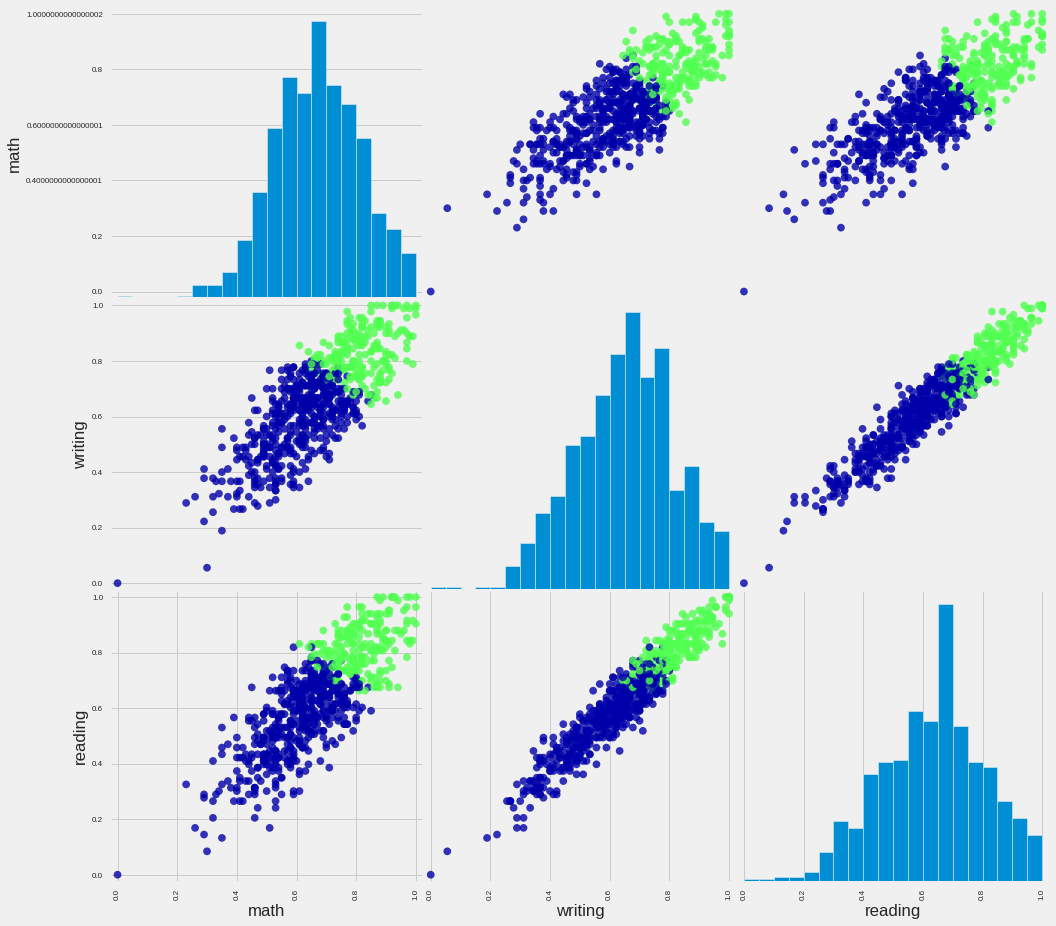

In [ ]:
student_dataframe = pd.DataFrame(X_train, 
                    columns=['math','writing','reading'])
grr = scatter_matrix(student_dataframe,c=y_train,figsize=(15, 15), marker='o',
hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)